## Quartic Potential
For convenience the key equations are given below from https://arxiv.org/pdf/astro-ph/9407016.pdf:

1) Fokker-Planck equation
$$    \frac{\partial P(\varphi,t)}{\partial t} = \frac{1}{3H}\frac{\partial}{\partial \varphi}\left(V'(\varphi) P(\varphi,t)\right) + \frac{H^3}{8\pi^2}\frac{\partial^2 P(\varphi,t)}{\partial \varphi^2} $$

2) Schrodinger-like equation
$$     -\frac{1}{2}\frac{\partial^2 \Phi_n(\varphi)}{\partial \varphi^2} + W(\varphi) \Phi_n (\varphi) = \frac{4\pi^2\Lambda_n}{H^3}\Phi_n(\varphi) $$

3) Effective potential
$$ W(\varphi) = \frac{1}{2}\left[v'(\varphi)^2-v''(\varphi)\right], \> \> v(\varphi) = \frac{4\pi^2}{3H^4} V(\varphi) $$

4) Solutions take the form
$$ P(\varphi,t) = \exp\left(-\frac{4\pi^2 V(\varphi)}{3H^4}\right) \sum^{\infty}_{n=0} a_n \Phi_n (\varphi) e^{-\Lambda_n (t-t_0)} $$

In [1]:
import numpy as np
from math import factorial
from scipy import optimize
from scipy.integrate import odeint, simps
from scipy.special import eval_hermite
import matplotlib.pyplot as plt
%matplotlib inline

## Defining key parameters 

In [2]:
hubble_rate = 1
mass = 0
mass_squared = mass**2
self_coupling = 1

For a self-interacting field, the interactions may be characterised by the following potentials
$$V(\varphi) = \frac{1}{2}m^2\varphi^2 + \frac{1}{4}\lambda\varphi^4 $$
$$    W(\varphi) = m^2\frac{2\pi^2}{3H^4}\left[\frac{4\pi^2}{3H^4} m^2 \varphi^2 - 1\right] + \lambda\frac{2\pi^2}{3H^4}\left[\frac{4\pi^2}{3H^4} \lambda \varphi^6 - 3 \varphi^2 \right] + m^2 \lambda \varphi^4 \left(\frac{4\pi^2}{3H^4} \right)^2$$

## Initial eigenfunction entries

In [3]:
# Even eigenfunction starting conditions
V_even = [1, 0]
# Odd eigenfunction starting conditions
V_odd = [0, 1]

In [4]:
class eigenfunction_finder:
    '''Class for finding the eigenfunction for a given eigenvalue'''
    def __init__(self, V, field):
        '''Initialises the range of field values for which the field is
        to be integrated
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values'''
        self.V = V
        self.field = field        
        
        # Parameters
        self.hubble_rate = 1
        self.mass_squared = 0
        self.self_coupling = 1
 
    def effective_potential(self, field):
        '''Defines the effective potential in the SL equation'''

        # Contribution to effective potential of quartic and squared terms respectively
        quartic_potential = self.self_coupling*((2*np.pi**2)/(3*self.hubble_rate**4))*(((4*np.pi**2)/(3*self.hubble_rate**4))*self.self_coupling*field**6 - 3*field**2)
        quadratic_potential = self.mass_squared*((2*np.pi**2)/(3*self.hubble_rate**4))*(((4*np.pi**2)/(3*self.hubble_rate**4))*self.mass_squared*field**2 - 1)
        mixed_terms = self.mass_squared*self.self_coupling*(((4*np.pi**2)/(3*self.hubble_rate**4))**2)*field**4
        
        W = quadratic_potential + quartic_potential + mixed_terms
        return W


    def schrodinger_like_ODE(self, V, field):
        '''Computes the derivatives of the Schrodinger-like equation'''

        # Empty array for derivatives
        dV = np.zeros(2)
        # Computes derivatives
        dV[0] = V[1]
        dV[1] = V[0]*(2*self.effective_potential(field) - (8*self.eigenvalue*np.pi**2)/(hubble_rate**3))
        return dV    

    def eigenfunction(self, eigenvalue):
        '''Integrates the eigenfunction for the field based on the given
        field range and returns the projected solution based on the
        eigenvalue'''
        
        self.eigenvalue = eigenvalue
        
        # Integrates to find eigenfunction
        V = odeint(self.schrodinger_like_ODE, self.V, self.field)
        
        return V[-1,0]
    
    def eigenfunction_full(self, eigenvalue):
        '''Integrates the eigenfunction for the field based on the given
        field range and returns the projected solution based on the
        eigenvalue'''
        
        self.eigenvalue = eigenvalue
        
        # Integrates to find eigenfunction
        V = odeint(self.schrodinger_like_ODE, self.V, self.field)

        return V[:,0]

In [5]:
# Field 
field = np.linspace(0, 3.5, 3000)

# Tolerance 
tolerance = 1e-6

# Scipy implementations of the Brent for n = 0
eigenvalue_function = eigenfunction_finder(V_even, field)
scipy_brent_0, results_brent_0 = optimize.brentq(eigenvalue_function.eigenfunction,-0.1, 0.2, full_output=True, xtol=tolerance)
scipy_brent_V_0 = eigenvalue_function.eigenfunction_full(scipy_brent_0)
print(results_brent_0)

      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 15
           root: 8.04061562588124e-09


In [6]:
# Identifying a suitable guess interval for n = 1
eigenvalue_function = eigenfunction_finder(V_odd, field)
print(eigenvalue_function.eigenfunction_full(0.1)[-1])
print(eigenvalue_function.eigenfunction_full(0.3)[-1])
print(eigenvalue_function.eigenfunction_full(0.5)[-1])
print(eigenvalue_function.eigenfunction_full(0.7)[-1])

-1.424442390981696e+210
-5.445426016607305e+210
-5.572774538066781e+209
1.0936220813325822e+210


In [7]:
# Scipy implementations of the Brent algoritms for n = 1
eigenvalue_function = eigenfunction_finder(V_odd, field)
scipy_brent_1, results_brent_1 = optimize.brentq(eigenvalue_function.eigenfunction, 0.5, 0.7, full_output=True, xtol=tolerance)
scipy_brent_V_1 = eigenvalue_function.eigenfunction_full(scipy_brent_1)
print(results_brent_1)

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: 0.5366714470633597


In [8]:
# Identifying a suitable guess interval for n = 2
eigenvalue_function = eigenfunction_finder(V_even, field)
print(eigenvalue_function.eigenfunction_full(0.6)[-1])
print(eigenvalue_function.eigenfunction_full(0.9)[-1])

1.2102284580184852e+211
-2.287430507436089e+210


In [9]:
# Scipy implementations of the Brent algoritms for n = 2
eigenvalue_function = eigenfunction_finder(V_even, field)
scipy_brent_2, results_brent_2 = optimize.brentq(eigenvalue_function.eigenfunction, 0.6, 0.9, full_output=True, xtol=tolerance)
scipy_brent_V_2 = eigenvalue_function.eigenfunction_full(scipy_brent_2)
print(results_brent_2)

      converged: True
           flag: 'converged'
 function_calls: 15
     iterations: 14
           root: 0.8289521829570561


Note that as I my guess intervals skipped some of the eigenvalues the $n = 1$, and $n =2$ cases above are actually those for $n=3$ and $n=4$ respectively. The actual $n=1,2$ cases are given below.

In [10]:
# Scipy implementations of the Brent algoritms for n = 1
eigenvalue_function = eigenfunction_finder(V_odd, field)
scipy_brent_1, results_brent_1 = optimize.brentq(eigenvalue_function.eigenfunction, 0, 0.1, full_output=True, xtol=tolerance)
scipy_brent_V_1 = eigenvalue_function.eigenfunction_full(scipy_brent_1)
print(results_brent_1)

      converged: True
           flag: 'converged'
 function_calls: 13
     iterations: 12
           root: 0.08892383530399899


In [11]:
# Scipy implementations of the Brent algoritms for n = 2
eigenvalue_function = eigenfunction_finder(V_even, field)
scipy_brent_2, results_brent_2 = optimize.brentq(eigenvalue_function.eigenfunction, 0.2, 0.4, full_output=True, xtol=tolerance)
scipy_brent_V_2 = eigenvalue_function.eigenfunction_full(scipy_brent_2)
print(results_brent_2)

      converged: True
           flag: 'converged'
 function_calls: 13
     iterations: 12
           root: 0.28937856555307656


In [12]:
class brent:
    '''Root finding class with the aforementioned
    algorithms implemented as methods'''
    def __init__(self, interval):
        '''Initialization of eigenvalues where the bracketed eigenvalues
        are assigned as attributes.
        interval: two element array where the first entry is the lower 
        eigenvalue and the second element is the higher eigenvalue'''
        
        # Setting up initial trial eigenvalues
        self.initial_low_eigenvalue = interval[0]
        self.initial_high_eigenvalue = interval[1]
        
        # Parameters
        self.hubble_rate = 1
        self.mass_squared = 0
        self.self_coupling = 1
        
    
    def effective_potential(self, field):
        '''Defines the effective potential in the SL equation
        field: field value'''
        
        # Contribution to effective potential of quartic and squared terms respectively
        quartic_potential = self.self_coupling*((2*np.pi**2)/(3*self.hubble_rate**4))*(((4*np.pi**2)/(3*self.hubble_rate**4))*self.self_coupling*field**6 - 3*field**2)
        quadratic_potential = self.mass_squared*((2*np.pi**2)/(3*self.hubble_rate**4))*(((4*np.pi**2)/(3*self.hubble_rate**4))*self.mass_squared*field**2 - 1)
        mixed_terms = self.mass_squared*self.self_coupling*(((4*np.pi**2)/(3*self.hubble_rate**4))**2)*field**4        
        
        W = quadratic_potential + quartic_potential + mixed_terms
        return W
    
    def schrodinger_like_ODE(self, V, field):
        '''Computes the derivatives of the Schrodinger-like equation
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values'''
    
        # Empty array for derivatives
        dV = np.zeros(2)

        # Computes derivatives
        dV[0] = V[1]
        dV[1] = V[0]*(2*self.effective_potential(field) - (8*self.eigenvalue*np.pi**2)/(hubble_rate**3))
        return dV    

    def brent_loop(self, V, field, tolerance, max_iterations):
        '''Implements Brents method to compute eigenvalues.
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values
        tolerance: determines how close to zero the solutions should reach 
        to be deemed to have converged sufficiently
        max_iterations: caps the number of iterations the loop undergoes
        in the event the tolerance is not reached'''
        
         # Initial low eigenvalue and its solution
        self.high_eigenvalue = self.initial_high_eigenvalue
        self.eigenvalue = self.high_eigenvalue
        V_high = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_brent = 1
    
        # Initial high eigenvalue and its solution
        self.low_eigenvalue = self.initial_low_eigenvalue
        self.eigenvalue = self.low_eigenvalue
        V_low = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_brent += 1
        
        # Initial midpoint eigenvalue and its solution
        self.new_eigenvalue = 0.5*(self.high_eigenvalue + self.low_eigenvalue)
        self.eigenvalue = self.new_eigenvalue
        V_new = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_brent += 1
        
        # Initializing number of iterations
        iterations = 0
        # Loop that runs until we hit the desired tolerance or max_iterations is exceeded
        while self.high_eigenvalue - self.low_eigenvalue > tolerance:
            # Computes parameters associated with Brents' method
            R = V_new[-1,0]/V_high[-1,0]
            S = V_new[-1,0]/V_low[-1,0]
            T = V_low[-1,0]/V_high[-1,0]
            P = S*(T*(R - T)*(self.high_eigenvalue - self.new_eigenvalue) - (1 - R)*(self.new_eigenvalue - self.low_eigenvalue))
            Q = (T - 1)*(R - 1)*(S - 1)
            
            # Next guess for root based on Brent's method
            next_eigenvalue = self.new_eigenvalue + P/Q
            # Compares convergence with bisection
            if abs(next_eigenvalue - self.new_eigenvalue) < (self.initial_high_eigenvalue - self.initial_low_eigenvalue)*0.5**(iterations+2):
                # Checks to see which half of the current bounds the next guess lies then redefines the bounds
                if next_eigenvalue < self.new_eigenvalue:
                    self.high_eigenvalue = self.new_eigenvalue
                    self.eigenvalue = self.high_eigenvalue
                    V_high = V_new #odeint(self.schrodinger_like_ODE, V, field)
                    #self.function_calls_brent += 1
    
                else:
                    self.low_eigenvalue = self.new_eigenvalue
                    self.eigenvalue = self.low_eigenvalue
                    V_low = V_new # odeint(self.schrodinger_like_ODE, V, field)
                    #self.function_calls_brent += 1
                
                # Updates guess of root
                self.new_eigenvalue = next_eigenvalue
                self.eigenvalue = self.new_eigenvalue
                V_new = odeint(self.schrodinger_like_ODE, V, field)
                self.function_calls_brent += 1
            
            # Tries bisection if convergence was deemed too slow
            else:
                # Checks to see which boundary eigenvalue gives positive or negative diverging solutions
                if V_high[-1,0] > V_new[-1,0] > V_low[-1,0]:
                    # Checks if the midpoint eigenvalue gives negatively diverging solutions
                    if V_new[-1,0] < 0:                    
                        # Sets eigenvalue c to be eigenvalue a, likewise for the solutions
                        V_low = V_new
                        self.low_eigenvalue = self.new_eigenvalue
                    
                        # Determines the new midpoint eigenvalue and its solutions
                        self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                        self.eigenvalue = self.new_eigenvalue
                        V_new = odeint(self.schrodinger_like_ODE, V, field)
                        self.function_calls_brent += 1
                        
                    # Runs if the midpoint eigenvalue converges to positive infinity
                    else:
                        # Sets eigenvalue c to be eigenvalue b, likewise for the solutions
                        V_high = V_new
                        self.high_eigenvalue = self.new_eigenvalue
                    
                        # Determines the new midpoint eigenvalue and its solutions
                        self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                        self.eigenvalue = self.new_eigenvalue
                        V_new = odeint(self.schrodinger_like_ODE, V, field)
                        self.function_calls_brent += 1
                        
                # Runs if the higher eigenvalue gives negative diverging solutions while the lower gives the reverse
                else:
                    # Checks if the midpoint eigenvalue gives negatively diverging solutions
                    if V_new[-1,0] < 0:
                        # Sets eigenvalue c to be eigenvalue b, likewise for the solutions
                        V_high = V_new
                        self.high_eigenvalue = self.new_eigenvalue
                    
                        # Determines the new midpoint eigenvalue and its solutions
                        self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                        self.eigenvalue = self.new_eigenvalue
                        V_new = odeint(self.schrodinger_like_ODE, V, field)
                        self.function_calls_brent += 1
                        
                    # Runs if the midpoint eigenvalue converges to positive infinity
                    else:
                        # Sets eigenvalue c to be eigenvalue a, likewise for the solutions
                        V_low = V_new
                        self.low_eigenvalue = self.new_eigenvalue
                    
                        # Determines the new midpoint eigenvalue and its solutions
                        self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                        self.eigenvalue = self.new_eigenvalue
                        V_new = odeint(self.schrodinger_like_ODE, V, field)
                        self.function_calls_brent += 1
            
            # Updates number of iterations
            iterations = iterations + 1
            # If max_iterations is exceeded the loop is stopped
            if iterations >= max_iterations:
                break
                
        return self.new_eigenvalue, V_new, iterations

In [13]:
# Field 
field = np.linspace(0, 3.5, 3000)

# Tolerance
tolerance = 1e-6

# Running the Brent algorithms for n = 0
brent_solver = brent([-0.1, 0.2])
eigenvalue_brent_0, V_brent_0, iterations_brent_0 = brent_solver.brent_loop(V_even, field, tolerance, 100)
brent_function_calls_0 = brent_solver.function_calls_brent

# Running the Brent algorithm for n = 1
brent_solver = brent([0, 0.1])
eigenvalue_brent_1, V_brent_1, iterations_brent_1 = brent_solver.brent_loop(V_odd, field, tolerance, 100)
brent_function_calls_1 = brent_solver.function_calls_brent

# Running the Brent algorithm for n = 2
brent_solver = brent([0.2, 0.4])
eigenvalue_brent_2, V_brent_2, iterations_brent_2 = brent_solver.brent_loop(V_even, field, tolerance, 100)
brent_function_calls_2 = brent_solver.function_calls_brent

In [14]:
print(eigenvalue_brent_0, eigenvalue_brent_1, eigenvalue_brent_2)
print(iterations_brent_0, iterations_brent_1, iterations_brent_2)
print(brent_function_calls_0, brent_function_calls_1, brent_function_calls_2)

1.4869033898820694e-10 0.08892393083553396 0.28937854849714445
7 6 6
10 9 9


We now reintroduce the mass term for the positive mass squared term.

In [15]:
# Field 
field = np.linspace(0, 2, 3000)

# Tolerance 
tolerance = 1e-6

# Scipy implementations of the Brent for n = 0
eigenvalue_function = eigenfunction_finder(V_even, field)
eigenvalue_function.mass_squared = 1
scipy_brent_0, results_brent_0 = optimize.brentq(eigenvalue_function.eigenfunction,-0.1, 0.2, full_output=True, xtol=tolerance)
scipy_brent_V_0 = eigenvalue_function.eigenfunction_full(scipy_brent_0)
print(results_brent_0)

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 1.2919183794051076e-08


In [16]:
# Scipy implementations of the Brent algoritms for n = 1
eigenvalue_function = eigenfunction_finder(V_odd, field)
eigenvalue_function.mass_squared = 1
scipy_brent_1, results_brent_1 = optimize.brentq(eigenvalue_function.eigenfunction, 0, 0.4, full_output=True, xtol=tolerance)
scipy_brent_V_1 = eigenvalue_function.eigenfunction_full(scipy_brent_1)
print(results_brent_1)
print(scipy_brent_1/2)

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.36546275495978076
0.18273137747989038


In [17]:
# Scipy implementations of the Brent algoritms for n = 2
eigenvalue_function = eigenfunction_finder(V_even, field)
eigenvalue_function.mass_squared = 1
scipy_brent_2, results_brent_2 = optimize.brentq(eigenvalue_function.eigenfunction, 0.4, 0.8, full_output=True, xtol=tolerance)
scipy_brent_V_2 = eigenvalue_function.eigenfunction_full(scipy_brent_2)
print(results_brent_2)
print(scipy_brent_2/2)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.7877048499030161
0.3938524249515081


In [18]:
# Field 
field = np.linspace(0, 2, 3000)

# Tolerance
tolerance = 1e-6

# Running the Brent algorithms for n = 0
brent_solver = brent([-0.1, 0.2])
brent_solver.mass_squared = 1
eigenvalue_brent_0, V_brent_0, iterations_brent_0 = brent_solver.brent_loop(V_even, field, tolerance, 100)
brent_function_calls_0 = brent_solver.function_calls_brent

# Running the Brent algorithm for n = 1
brent_solver = brent([0, 0.4])
brent_solver.mass_squared = 1
eigenvalue_brent_1, V_brent_1, iterations_brent_1 = brent_solver.brent_loop(V_odd, field, tolerance, 100)
brent_function_calls_1 = brent_solver.function_calls_brent

# Running the Brent algorithm for n = 2
brent_solver = brent([0.3, 0.8])
brent_solver.mass_squared = 1
eigenvalue_brent_2, V_brent_2, iterations_brent_2 = brent_solver.brent_loop(V_even, field, tolerance, 100)
brent_function_calls_2 = brent_solver.function_calls_brent

In [19]:
print(eigenvalue_brent_0, eigenvalue_brent_1, eigenvalue_brent_2)
print(iterations_brent_0, iterations_brent_1, iterations_brent_2)
print(brent_function_calls_0, brent_function_calls_1, brent_function_calls_2)

1.2032096589576792e-08 0.36546275546970935 0.7877048480821647
6 7 8
9 10 11


Now we consider the double-well potential which consists of a negative effective mass term.

In [20]:
# Field 
field = np.linspace(0, 2, 3000)

# Tolerance 
tolerance = 1e-6

# Scipy implementations of the Brent for n = 0
eigenvalue_function = eigenfunction_finder(V_even, field)
eigenvalue_function.mass_squared = -1
scipy_brent_0, results_brent_0 = optimize.brentq(eigenvalue_function.eigenfunction, -0.2, 0.1, full_output=True, xtol=tolerance)
scipy_brent_V_0 = eigenvalue_function.eigenfunction_full(scipy_brent_0)
print(results_brent_0)

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: -1.8674155206492762e-07


In [21]:
# Scipy implementations of the Brent algoritms for n = 1
eigenvalue_function = eigenfunction_finder(V_odd, field)
eigenvalue_function.mass_squared = -1
scipy_brent_1, results_brent_1 = optimize.brentq(eigenvalue_function.eigenfunction, -0.1, 0.2, full_output=True, xtol=tolerance)
scipy_brent_V_1 = eigenvalue_function.eigenfunction_full(scipy_brent_1)
print(results_brent_1)

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 0.0001945918616035716


In [22]:
# Scipy implementations of the Brent algoritms for n = 2
eigenvalue_function = eigenfunction_finder(V_even, field)
eigenvalue_function.mass_squared = -1
scipy_brent_2, results_brent_2 = optimize.brentq(eigenvalue_function.eigenfunction, 0.1, 0.3, full_output=True, xtol=tolerance)
scipy_brent_V_2 = eigenvalue_function.eigenfunction_full(scipy_brent_2)
print(results_brent_2)
print(scipy_brent_2/2)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.2817118516132696
0.1408559258066348


In [23]:
# Field 
field = np.linspace(0, 2, 3000)

# Tolerance
tolerance = 1e-6

# Running the Brent algorithms for n = 0
brent_solver = brent([-0.1, 0.2])
brent_solver.mass_squared = -1
eigenvalue_brent_0, V_brent_0, iterations_brent_0 = brent_solver.brent_loop(V_even, field, tolerance, 100)
brent_function_calls_0 = brent_solver.function_calls_brent

# Running the Brent algorithm for n = 1
brent_solver = brent([-0.1, 0.2])
brent_solver.mass_squared = -1
eigenvalue_brent_1, V_brent_1, iterations_brent_1 = brent_solver.brent_loop(V_odd, field, tolerance, 100)
brent_function_calls_1 = brent_solver.function_calls_brent

# Running the Brent algorithm for n = 2
brent_solver = brent([0.1, 0.3])
brent_solver.mass_squared = -1
eigenvalue_brent_2, V_brent_2, iterations_brent_2 = brent_solver.brent_loop(V_even, field, tolerance, 100)
brent_function_calls_2 = brent_solver.function_calls_brent

In [24]:
print(eigenvalue_brent_0, eigenvalue_brent_1, eigenvalue_brent_2)
print(iterations_brent_0, iterations_brent_1, iterations_brent_2)
print(brent_function_calls_0, brent_function_calls_1, brent_function_calls_2)

-5.616012791137896e-09 0.00019459188129001217 0.28171194671749805
9 7 7
12 10 10


In [25]:
# Computes the full eigenfunction based on the its symmetry
def full_eigenfunction(field, eigenfunction, parity):
    '''Determines the full eigenfunction based on the parity of the eigenfunction.
    Only applies in the case of symmetric potentials.
    field: half of the field values over which we integrated
    eigenfunction: integrated eigenfunction
    parity: variable determining the symmetry of the eigenfunction. 1 indicates
    even, -1 indicates odd'''
    
    # Checks to see if parity is a valid value
    if parity**2 == 1:
        # Determines the full range of field values
        field_reflection = -np.flip(field[1:])
        field = np.append(field_reflection, field)
    
        # Determines full eigenfunction for the full range of field values
        eigenfunction_reflection = parity*np.flip(eigenfunction[1:])
        eigenfunction = np.append(eigenfunction_reflection, eigenfunction)

        return field, eigenfunction

In [26]:
# Integration interval
dphi = field[1] - field[0]

# Normalisation n = 0
N_brent_0 = np.sqrt(2*simps(scipy_brent_V_0[:2500]**2, field[:2500], dphi))
scipy_brent_V_0 = scipy_brent_V_0[:2500]/N_brent_0

# Normalisation n = 1
N_brent_1 = np.sqrt(2*simps(scipy_brent_V_1[:2500]**2, field[:2500], dphi))
scipy_brent_V_1 = scipy_brent_V_1[:2500]/N_brent_1

# Normalisation n = 2
N_brent_2 = np.sqrt(2*simps(scipy_brent_V_2[:2500]**2, field[:2500], dphi))
scipy_brent_V_2 = scipy_brent_V_2[:2500]/N_brent_2

In [27]:
# Computes full range of field and eigenfunction values
field_full, scipy_brent_V_0 = full_eigenfunction(field[:2500], scipy_brent_V_0, 1)
field_full, scipy_brent_V_1 = full_eigenfunction(field[:2500], scipy_brent_V_1, -1)
field_full, scipy_brent_V_2 = full_eigenfunction(field[:2500], scipy_brent_V_2, 1)

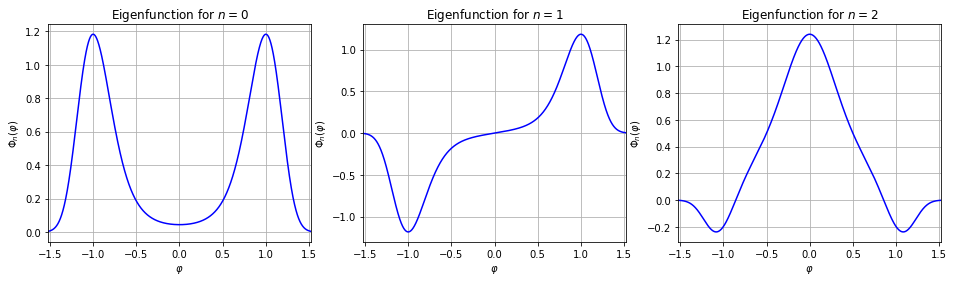

In [28]:
# Plotting error
fig = plt.figure(figsize=(16, 4))

# n = 0 eigenfunction
ax0 = fig.add_subplot(1,3,1)
ax0.grid()
ax0.set_title("Eigenfunction for $n=0$")
ax0.set_ylabel("$\Phi_n(\\varphi)$")
ax0.set_xlabel("$\\varphi$")
ax0.set_xlim(-1.52, 1.52)
ax0.plot(field_full, scipy_brent_V_0, "b")

# n = 1 eigenfunction
ax1 = fig.add_subplot(1,3,2)
ax1.grid()
ax1.set_title("Eigenfunction for $n=1$")
ax1.set_ylabel("$\Phi_n(\\varphi)$")
ax1.set_xlabel("$\\varphi$")
ax1.set_xlim(-1.52, 1.52)
ax1.plot(field_full, scipy_brent_V_1, "b")

# n = 2 eigenfunction
ax2 = fig.add_subplot(1,3,3)
ax2.grid()
ax2.set_title("Eigenfunction for $n=2$")
ax2.set_ylabel("$\Phi_n(\\varphi)$")
ax2.set_xlabel("$\\varphi$")
ax2.set_xlim(-1.52, 1.52)
ax2.plot(field_full, scipy_brent_V_2, "b")

## Parameterising quantities
What follows are the parameterised variables given in https://arxiv.org/pdf/1904.11917.pdf for the arbitrary case with $m^2>0$.
$$ \alpha \equiv \frac{m^2}{\sqrt{\lambda}H^2}.  $$
$$ z \equiv \frac{\lambda^{1/4}\Omega}{H}\varphi, \>\> \Omega \equiv 1 + \sqrt{\alpha}. $$
With the above parameters the Schrödinger-like equation takes the form 
$$\frac{\partial \Phi_n(z)}{\partial z} \equiv Y, $$
$$\frac{\partial Y}{\partial z} = \left(-\frac{4\pi^2 \alpha}{3\Omega^2}-4\pi^2\frac{1-\frac{4\pi^2}{9}\alpha^2}{\Omega^4}z^2+\frac{32\pi^4\alpha z^4}{9\Omega^6} + \frac{16\pi^4 z^6}{9\Omega^8}-\frac{8\pi^2(1+\alpha)\tilde{\Lambda}(\alpha)}{\Omega^2}\right)\Phi_n(z).  $$
Eigenvalues are rescaled as 
$$\tilde{\Lambda}_n(\alpha) = \frac{\Lambda_n}{\lambda^{1/2}H(1+\alpha)} $$

In [29]:
class eigenfunction_finder_rescaled:
    '''Class for finding the eigenfunction for a the rescaled parameters z and alpha'''
    def __init__(self, V, z):
        '''Initialises the range of rescaled field values for which the field is
        to be integrated
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        z: rescaled field values'''
        self.V = V
        self.z = z       
        
        # Parameters
        self.alpha = 1
 
    def schrodinger_like_ODE(self, V, z):
        '''Computes the derivatives of the Schrodinger-like equation'''
        
        # Empty array for derivatives
        dV = np.zeros(2)
        
        # Determines omega and calculates quantities in the Schrodinger-like equation
        if self.alpha > 0: 
            omega = 1 + np.sqrt(self.alpha)
            
            # Dummy variables that form the various terms in the Schrodinger-like equation
            x_1 = - (4*self.alpha*np.pi**2)/(3*omega**2) - ((4*np.pi**2)*(1 - 4*((np.pi*self.alpha)**2)/9)/(omega**4))*z**2
            x_2 = (32*self.alpha*(np.pi*z)**4)/(9*omega**6) + (16*(np.pi**4)*z**6)/(9*omega**8)
            x_3 = -(8*self.eigenvalue*(1 + self.alpha)*np.pi**2)/(omega**2)
            
        else:
            omega = 1 + np.sqrt(-self.alpha)
            
            # Dummy variables that form the various terms in the Schrodinger-like equation
            x_1 = - (4*self.alpha*np.pi**2)/(3*omega**2) - ((4*np.pi**2)*(1 - 4*((np.pi*self.alpha)**2)/9)/(omega**4))*z**2
            x_2 = (32*self.alpha*(np.pi*z)**4)/(9*omega**6) + (16*(np.pi**4)*z**6)/(9*omega**8)
            x_3 = -(8*self.eigenvalue*(1 - self.alpha)*np.pi**2)/(omega**2)
            
        # Computes derivatives
        dV[0] = V[1]
        dV[1] = V[0]*(x_1 + x_2 + x_3)
        return dV    

    def eigenfunction(self, eigenvalue):
        '''Integrates the eigenfunction for the field based on the given
        field range and returns the projected solution based on the
        eigenvalue'''
        
        self.eigenvalue = eigenvalue
        
        # Integrates to find eigenfunction
        V = odeint(self.schrodinger_like_ODE, self.V, self.z)
        
        return V[-1,0]
    
    def eigenfunction_full(self, eigenvalue):
        '''Integrates the eigenfunction for the field based on the given
        field range and returns the projected solution based on the
        eigenvalue'''
        
        self.eigenvalue = eigenvalue
        
        # Integrates to find eigenfunction
        V = odeint(self.schrodinger_like_ODE, self.V, self.z)

        return V[:,0]

In [30]:
# Field 
z = np.linspace(0, 4, 3000)

# Tolerance 
tolerance = 1e-6

# Scipy implementations of the Brent for n = 0
eigenvalue_function = eigenfunction_finder_rescaled(V_even, z)
eigenvalue_function.alpha = 1
scipy_brent_0, results_brent_0 = optimize.brentq(eigenvalue_function.eigenfunction,-0.1, 0.2, full_output=True, xtol=tolerance)
scipy_brent_V_0 = eigenvalue_function.eigenfunction_full(scipy_brent_0)
print(results_brent_0)

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: -6.095066193013746e-10


In [31]:
# Scipy implementations of the Brent for n = 1
eigenvalue_function = eigenfunction_finder_rescaled(V_odd, z)
eigenvalue_function.alpha = 1
scipy_brent_1, results_brent_1 = optimize.brentq(eigenvalue_function.eigenfunction, 0.1, 0.3, full_output=True, xtol=tolerance)
scipy_brent_V_1 = eigenvalue_function.eigenfunction_full(scipy_brent_1)
print(results_brent_1)

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.18273132555378416


In [32]:
# Scipy implementations of the Brent for n = 2
eigenvalue_function = eigenfunction_finder_rescaled(V_even, z)
eigenvalue_function.alpha = 1
scipy_brent_2, results_brent_2 = optimize.brentq(eigenvalue_function.eigenfunction, 0.3, 0.5, full_output=True, xtol=tolerance)
scipy_brent_V_2 = eigenvalue_function.eigenfunction_full(scipy_brent_2)
print(results_brent_2)

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 0.393852403982049


In [33]:
# Generates range of alpha values
alpha = np.logspace(-2, 2, 50)

# Empty array to store all eigenvalues
eigenvalues_1 = np.zeros(len(alpha))
eigenvalues_2 = np.zeros(len(alpha))
eigenvalues_3 = np.zeros(len(alpha))
eigenvalues_4 = np.zeros(len(alpha))

# Field 
z = np.linspace(0, 3, 3000)

# Tolerance 
tolerance = 1e-6

# Eigenvalue guess interval
eigenvalue_upper = 0.35
eigenvalue_lower = 0.05

# Loop over all values of alpha
for i in range(len(alpha)):
    # Scipy implementations of the Brent for n = 1
    eigenvalue_function = eigenfunction_finder_rescaled(V_odd, z)
    eigenvalue_function.alpha = alpha[i]
    eigenvalues_1[i], results_brent_1 = optimize.brentq(eigenvalue_function.eigenfunction, eigenvalue_lower, eigenvalue_upper, full_output=True, xtol=tolerance)

In [34]:
# Field 
z = np.linspace(0, 3, 3000)

# Tolerance 
tolerance = 1e-6

# Eigenvalue guess interval
eigenvalue_upper = 0.7
eigenvalue_lower = 0.2

# Loop over all values of alpha
for i in range(len(alpha)):
    # Scipy implementations of the Brent for n = 2
    eigenvalue_function = eigenfunction_finder_rescaled(V_even, z)
    eigenvalue_function.alpha = alpha[i]
    eigenvalues_2[i], results_brent_2 = optimize.brentq(eigenvalue_function.eigenfunction, eigenvalue_lower, eigenvalue_upper, full_output=True, xtol=tolerance)

In [35]:
# Field 
z = np.linspace(0, 3, 3000)

# Tolerance 
tolerance = 1e-6

# Eigenvalue guess interval
eigenvalue_upper = 1
eigenvalue_lower = 0.5

# Loop over all values of alpha
for i in range(len(alpha)):
    # Scipy implementations of the Brent for n = 3
    eigenvalue_function = eigenfunction_finder_rescaled(V_odd, z)
    eigenvalue_function.alpha = alpha[i]
    eigenvalues_3[i], results_brent_3 = optimize.brentq(eigenvalue_function.eigenfunction, eigenvalue_lower, eigenvalue_upper, full_output=True, xtol=tolerance)

In [36]:
# Field 
z = np.linspace(0, 3, 3000)

# Tolerance 
tolerance = 1e-6

# Eigenvalue guess interval
eigenvalue_upper = 1.4
eigenvalue_lower = 0.8

# Loop over all values of alpha
for i in range(len(alpha)):
    # Scipy implementations of the Brent for n = 4
    eigenvalue_function = eigenfunction_finder_rescaled(V_even, z)
    eigenvalue_function.alpha = alpha[i]
    eigenvalues_4[i], results_brent_4 = optimize.brentq(eigenvalue_function.eigenfunction, eigenvalue_lower, eigenvalue_upper, full_output=True, xtol=tolerance)

Below are the plots of the scaled eigenvalues $\tilde{\Lambda}_n$ for a range of $\alpha$ values. These seem to be consistent with the ones presented in the paper.

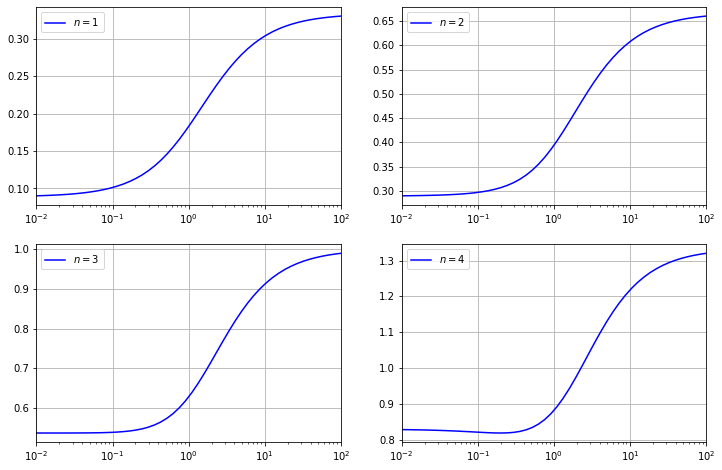

In [37]:
# Plotting 
fig = plt.figure(figsize=(12, 8))

# n = 1 
ax0 = fig.add_subplot(2, 2, 1)
ax0.grid()
ax0.set_xlim(1e-2, 1e2)
ax0.set_xscale("log")
ax0.plot(alpha, eigenvalues_1, "b", label="$n=1$")
ax0.legend()

# n = 2
ax1 = fig.add_subplot(2, 2, 2)
ax1.grid()
ax1.set_xlim(1e-2, 1e2)
ax1.set_xscale("log")
ax1.plot(alpha, eigenvalues_2, "b", label="$n=2$")
ax1.legend()

# n = 3
ax2 = fig.add_subplot(2, 2, 3)
ax2.grid()
ax2.set_xlim(1e-2, 1e2)
ax2.set_xscale("log")
ax2.plot(alpha, eigenvalues_3, "b", label="$n=3$")
ax2.legend()

# n = 4
ax3 = fig.add_subplot(2, 2 ,4)
ax3.grid()
ax3.set_xlim(1e-2, 1e2)
ax3.set_xscale("log")
ax3.plot(alpha, eigenvalues_4, "b", label="$n=4$")
ax3.legend()

For the double-well potential the following definition is used in https://arxiv.org/pdf/2001.04494.pdf:
$$\bar{\alpha} \equiv -\alpha, $$
or equivalently
$$ \bar{\alpha} \equiv \frac{-m^2}{\sqrt{\lambda}H^2}.  $$
We also have
$$ z \equiv \frac{\lambda^{1/4}\Omega}{H}\varphi, \>\> \Omega \equiv 1 + \sqrt{\bar{\alpha}}. $$
With the above parameters the Schrödinger-like equation takes the form 
$$\frac{\partial \Phi_n(z)}{\partial z} \equiv Y, $$
$$\frac{\partial Y}{\partial z} = \left(\frac{4\pi^2 \bar{\alpha}}{3\Omega^2}-4\pi^2\frac{1-\frac{4\pi^2}{9}\bar{\alpha}^2}{\Omega^4}z^2-\frac{32\pi^4\bar{\alpha} z^4}{9\Omega^6} + \frac{16\pi^4 z^6}{9\Omega^8}-\frac{8\pi^2(1+\bar{\alpha})\tilde{\Lambda}(\bar{\alpha})}{\Omega^2}\right)\Phi_n(z).  $$
Eigenvalues are rescaled as 
$$\tilde{\Lambda}_n(\alpha) = \frac{\Lambda_n}{\lambda^{1/2}H(1+\bar{\alpha})}. $$
We also keep in mind that the integration range might need to be adjusted for the range of possible double-wells as the minima may move beyond the integration range for some values of $\bar{\alpha}$. The minima in the potential correspond to 
$$z_0 = \pm \sqrt{\bar{\alpha}}\Omega = \sqrt{\bar{\alpha}}\left(1+\sqrt{\bar{\alpha}}\right),$$
and the minima in the effective potential correspond to
$$z_0 = \pm \frac{\bar{\alpha}+1}{\sqrt{3}}\left(\sqrt{\bar{\alpha}^2+\frac{27}{4\pi^2}} + 2\bar{\alpha}\right)^{1/2}. $$
We therefore adjust the integration range to try and account for this $\bar{\alpha}$.

In [38]:
# Generates range of alpha values
alpha = -np.logspace(-2, 1, 50)

# Empty array to store all eigenvalues
eigenvalues_1 = np.zeros(len(alpha))
eigenvalues_2 = np.zeros(len(alpha))
eigenvalues_3 = np.zeros(len(alpha))
eigenvalues_4 = np.zeros(len(alpha))

# Tolerance 
tolerance = 1e-6

# Eigenvalue guess interval
eigenvalue_upper = 0.1
eigenvalue_lower = -0.05

# Loop over all values of alpha
for i in range(len(alpha)):
    # Determines location of minima for current alpha value and then determines integration range accordingly
    z_0 = ((-alpha[i] + 1)/np.sqrt(3))*np.sqrt(np.sqrt(alpha[i]**2 + (27/(4*np.pi**2))) - 2*alpha[i])
    z = np.linspace(0, 3 + 0.4*z_0, 3000)
    # Scipy implementations of the Brent for n = 1
    eigenvalue_function = eigenfunction_finder_rescaled(V_odd , z)
    eigenvalue_function.alpha = alpha[i]
    eigenvalues_1[i], results_brent_1 = optimize.brentq(eigenvalue_function.eigenfunction, eigenvalue_lower, eigenvalue_upper, full_output=True, xtol=tolerance)

In [39]:
# Eigenvalue guess interval
eigenvalue_upper = 0.4
eigenvalue_lower = 0.1

# Loop over all values of alpha
for i in range(len(alpha)):
    # Determines location of minima for current alpha value and then determines integration range accordingly
    z_0 = np.sqrt(-alpha[i])*(1 + np.sqrt(-alpha[i]))
    z = np.linspace(0, 2 + 0.7*z_0, 3000)
    # Scipy implementations of the Brent for n = 2
    eigenvalue_function = eigenfunction_finder_rescaled(V_even, z)
    eigenvalue_function.alpha = alpha[i]
    V_upper = eigenvalue_function.eigenfunction(eigenvalue_upper)
    V_lower = eigenvalue_function.eigenfunction(eigenvalue_lower)
    # Loop to ensure sign change in guess interval
    while V_upper/V_lower > 0:
        eigenvalue_upper -= 0.01
        eigenvalue_lower += 0.001
        V_upper = eigenvalue_function.eigenfunction(eigenvalue_upper) 
        V_lower = eigenvalue_function.eigenfunction(eigenvalue_lower)
    eigenvalues_2[i], results_brent_2 = optimize.brentq(eigenvalue_function.eigenfunction, eigenvalue_lower, eigenvalue_upper, full_output=True, xtol=tolerance)

In [40]:
# Initial eigenvalue guess interval
eigenvalue_upper = 0.62
eigenvalue_lower = 0.18

# Variable that tracks whether eigenvalues are decreasing
decreasing = True
# Loop over all values of alpha
for i in range(len(alpha)):
    # Determines location of minima for current alpha value and then determines integration range accordingly
    z_0 = np.sqrt(-alpha[i])*(1 + np.sqrt(-alpha[i]))
    z = np.linspace(0, 2 + 0.7*z_0, 3000)
    # Scipy implementations of the Brent for n = 3
    eigenvalue_function = eigenfunction_finder_rescaled(V_odd, z)
    eigenvalue_function.alpha = alpha[i]
    
    # i > 1 so that we have computed at least two eigenvalues we compare the last two eigenvalues
    if i > 1:
        # Are we still decreasing?
        if decreasing == True:
            # Computes differences between our guess eigenvalues and the last eigenvalue calculated
            upper_difference = eigenvalue_upper - eigenvalues_3[i-1]
            lower_difference = eigenvalues_3[i-1] - eigenvalue_lower
            # Redefines interval so that the last eigenvalue is the new upper/lower bound
            if upper_difference < lower_difference:
                eigenvalue_upper = eigenvalues_3[i-1]
            else:
                eigenvalue_lower = eigenvalues_3[i-1]
            # Checks last two eigenvalues to see if we are still decreasing
            if eigenvalues_3[i-2] - eigenvalues_3[i-1] < 0:
                decreasing = False
    # If the interval is too small raise the higher eigenvalue guess
    if eigenvalue_upper - eigenvalue_lower < 0.03:
        eigenvalue_upper += 0.05
    # If we are no longer increasing we incrementally increase the lower and higher eigenvalues for the guess range
    if decreasing == False:
        V_upper = eigenvalue_function.eigenfunction(eigenvalue_upper)
        V_lower = eigenvalue_function.eigenfunction(eigenvalue_lower)
        # Loop to ensure sign change in guess interval
        while V_upper/V_lower > 0:
            eigenvalue_upper += 0.0005
            eigenvalue_lower += 0.0005
            V_upper = eigenvalue_function.eigenfunction(eigenvalue_upper) 
            V_lower = eigenvalue_function.eigenfunction(eigenvalue_lower)
            # Exit condition
            if eigenvalue_upper > 7:
                break
    
    eigenvalues_3[i], results_brent_3 = optimize.brentq(eigenvalue_function.eigenfunction, eigenvalue_lower, eigenvalue_upper, full_output=True, xtol=tolerance)

In [41]:
# Eigenvalue guess interval
eigenvalue_upper = 0.82
eigenvalue_lower = 0.29

decreasing = True
# Loop over all values of alpha
for i in range(len(alpha)):
    # Determines location of minima for current alpha value and then determines integration range accordingly
    z_0 = np.sqrt(-alpha[i])*(1 + np.sqrt(-alpha[i]))
    z = np.linspace(0, 2 + z_0, 3000)
    # Scipy implementations of the Brent for n = 4
    eigenvalue_function = eigenfunction_finder_rescaled(V_even, z)
    eigenvalue_function.alpha = alpha[i]

    # i > 1 so that we have computed at least two eigenvalues we compare the last two eigenvalues
    if i > 1:
        # Are we still decreasing?
        if decreasing == True:
            # Redefines interval so that the last eigenvalue is the new upper bound
            eigenvalue_upper = eigenvalues_4[i-1]
            # Checks last two eigenvalues to see if we are still decreasing
            if eigenvalues_4[i-2] - eigenvalues_4[i-1] < 0:
                decreasing = False
    # If interval is too small we increase the interval size
    if eigenvalue_upper - eigenvalue_lower < 0.02:
        eigenvalue_upper += 0.05
        eigenvalue_lower -= 0.009
    # If we are no longer increasing we incrementally increase the lower and higher eigenvalues for the guess range
    if decreasing == False:
        V_upper = eigenvalue_function.eigenfunction(eigenvalue_upper)
        V_lower = eigenvalue_function.eigenfunction(eigenvalue_lower)
        # Loop to ensure sign change in guess interval
        while V_upper/V_lower > 0:
            eigenvalue_upper += 0.0005
            eigenvalue_lower += 0.0005
            V_upper = eigenvalue_function.eigenfunction(eigenvalue_upper) 
            V_lower = eigenvalue_function.eigenfunction(eigenvalue_lower)
            # Exit condition
            if eigenvalue_upper > 9:
                break
    
    eigenvalues_4[i], results_brent_4 = optimize.brentq(eigenvalue_function.eigenfunction, eigenvalue_lower, eigenvalue_upper, full_output=True, xtol=tolerance)

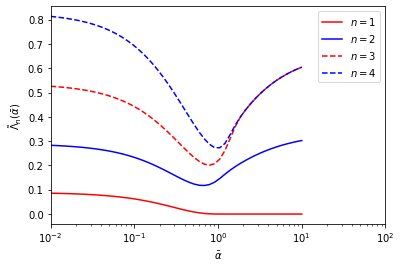

In [42]:
plt.plot(-alpha, eigenvalues_1, "r-", label="$n=1$")
plt.plot(-alpha, eigenvalues_2, "b-", label="$n=2$")
plt.plot(-alpha, eigenvalues_3, "r--", label="$n=3$")
plt.plot(-alpha, eigenvalues_4, "b--", label="$n=4$")
plt.xlim(1e-2, 1e2)
plt.legend()
plt.xlabel("$\\bar{\\alpha}$")
plt.ylabel("$\\tilde{\Lambda}_n(\\bar{\\alpha})$")
plt.xscale("log")